# Shrodinger Equation

## 1-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}\frac{\partial^2{\Psi(x, t)}}{\partial x^2} + U(x, t)\Psi(x, t)=i\hbar\frac{\partial\Psi(x, t)}{\partial t}
\end{equation}
$$

## 2-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}(\frac{\partial^2{\Psi(x, y, t)}}{\partial x^2}+\frac{\partial^2{\Psi(x, y, t)}}{\partial y^2}) + U(x, y, t)\Psi(x, y, t)=i\hbar\frac{\partial\Psi(x, y, t)}{\partial t}
\end{equation}
$$

## 3-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}(\frac{\partial^2{\Psi}}{\partial x^2}+\frac{\partial^2{\Psi}}{\partial y^2}+\frac{\partial^2{\Psi}}{\partial z^2}) + U(x, y, z, t)\Psi=i\hbar\frac{\partial\Psi}{\partial t}
\end{equation}
$$

## Infinite Potential Well(1d)

### potential energy
$$
\begin{equation}
    V(x) = 
    \left\{
        \begin{array}{cc}
            0, & -\frac{L}{2} < x < \frac{L}{2}, \\ 
            \infin, & otherwise,
        \end{array}
    \right.
\end{equation}
$$
where $L$ is the length of the box, the location of the center of the box is 0 and $x$ is the position of the particle.

### Def PDE of Shrodinger Equation in a infinite potential well

$$
\begin{equation}
    \left\{
        \begin{array}{cc}
        i\hbar\frac{\partial\Psi(x, t)}{\partial t}+\frac{\hbar^2}{2m}\frac{\partial\Psi(x, t)}{\partial x^2}=0 \\ \\
        \Psi(x, 0) = Asin(k_n(x+\frac{L}{2})) \\ \\
        \Psi(-\frac{L}{2}, t)=0 \\ \\
        \Psi(\frac{L}{2}, t)=0 \\ \\
        \end{array}
    \right.
    , -\frac{L}{2} < x < \frac{L}{2}
\end{equation}
$$
where $k_n=\frac{n\pi}{L}$, $n$ is a positive integer, and $|A|=\sqrt{\frac{2}{L}}$

### Finite Difference

$$
\begin{equation}
    \begin{array}{cc}
        \begin{split}
            \frac{\partial\Psi}{\partial t} 
            &= \frac{i}{2}\frac{\partial^2\Psi}{\partial x^2} \\
            &= \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
        \end{split}
    \end{array}
\end{equation}
$$

obtain,
$$
\begin{equation}
    \frac{\Psi_j^{n+1}-\Psi_j^n}{\Delta t} = \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
\end{equation}
$$
where $\Psi_j^{n}$ is the wave function value at j-th point when time equal to $n\Delta t$

then,
$$
\begin{equation}
    \Psi_j^{n+1} 
    = \Psi_j^n+\frac{i\Delta t}{2} \frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
\end{equation}
$$

matrix

$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{i\Delta t}{2\Delta x^2} 
    \left[
        \begin{array}{cc}
        -2&1&0&0&\cdots&0&0&0 \\
        1&-2&1&0&\cdots&0&0&0 \\
        0&1&-2&1&\cdots&0&0&0 \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        0&0&0&0&\cdots&1&-2&1 \\
        0&0&0&0&\cdots&0&1&-2 \\
        \end{array}
    \right]
    \left[
        \begin{array}{cc}
        \Psi^n_1 \\
        \Psi^n_2 \\
        \Psi^n_3 \\
        \vdots \\
        \vdots \\
        \Psi^n_{J-1} \\
        \Psi^n_J \\
        \end{array}
    \right]
\end{equation}
$$

because $\Psi(-\frac{L}{2}, t)=0$ and $\Psi(\frac{L}{2}, t)=0$

obtain
$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{i\Delta t}{2\Delta x^2} 
    \left[
        \begin{array}{cc}
        0&0&0&0&\cdots&0&0&0 \\
        1&-2&1&0&\cdots&0&0&0 \\
        0&1&-2&1&\cdots&0&0&0 \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        0&0&0&0&\cdots&1&-2&1 \\
        0&0&0&0&\cdots&0&0&0 \\
        \end{array}
    \right]
    \left[
        \begin{array}{cc}
        \Psi^n_1 \\
        \Psi^n_2 \\
        \Psi^n_3 \\
        \vdots \\
        \vdots \\
        \Psi^n_{J-1} \\
        \Psi^n_J \\
        \end{array}
    \right]
\end{equation}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Finite Difference

# state num
state_num = 1
# box length
box_l = 2
# cal time
time_total = 1
# time step
delta_time = 0.005
# space step
delta_x = 0.01
# time discrete num
time_n = int(time_total/delta_time)
# space discrete num
space_n = int(box_l/delta_x)

# result matrix space_point * time_point
phi_matrix = np.zeros((int(space_n), int(time_n)))
# def A matrix
parm_matrix = -2*np.eye(int(space_n)) + np.eye(int(space_n), k=1) + np.eye(int(space_n), k=-1)
parm_matrix[0, :] = 0
parm_matrix[-1, :] = 0


# init wave
phi_matrix[:, 0] = np.sin((state_num*np.pi/box_l)*(np.arange(-1, 1, delta_x)+box_l/2))

C:\Users\Koolo\anaconda3\envs\FlyAi_Pytorch1_5Python37\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01570732 0.01570732 0.01570732 ... 0.01570732 0.01570732 0.01570732]
 [0.03141076 0.03141076 0.03141076 ... 0.03141076 0.03141076 0.03141076]
 ...
 [0.04710645 0.04710645 0.04710645 ... 0.04710645 0.04710645 0.04710645]
 [0.03141076 0.03141076 0.03141076 ... 0.03141076 0.03141076 0.03141076]
 [0.01570732 0.01570732 0.01570732 ... 0.01570732 0.01570732 0.01570732]]


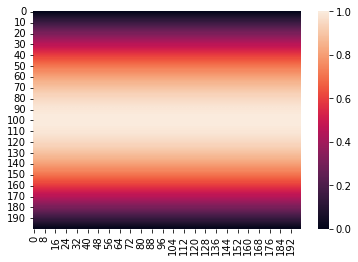

In [14]:
# iter
constant_ = 1.j*delta_time/(2*np.power(delta_x, 2))
for i in range(time_n-1):
    phi_matrix[:, i+1] = phi_matrix[:, i] + constant_ * np.matmul(parm_matrix, phi_matrix[:, i])
# prot
sns.heatmap(np.real(phi_matrix))
plt.show()